### DBSCAN 군집분석의 개념 및 원리를 알고자 이하를 수행했다. 

In [1]:
import sys
print(sys.version)

3.7.9 (default, Oct 26 2021, 22:54:39) 
[Clang 13.0.0 (clang-1300.0.29.3)]


In [4]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


위에서 DBSCAN 모델을 정의할 대, <b>parameter로 eps=0.5, min_sample=5</b>로 지정해주었다. 
DBSCAN은 K-means와 달리 처음에 군집의 개수를 정의하지 않는다. 자동적으로 최적의 군집개수를 찾아나가는 알고리즘이다. <b>eps는 여기서 한 데이터가 주변에 얼만큼 떨어진 거리를 같은 군집으로 생각할지의 기준에서 거리</b>이다. 그리고 <b>min_samples는 적어도 한 군집에는 5개의 sample들이 모여야 군집으로 인정</b>한다는 것이다. 

여기서 eps는 반지름의 크기를 말하는 것이다. 

- 이하는 예측값

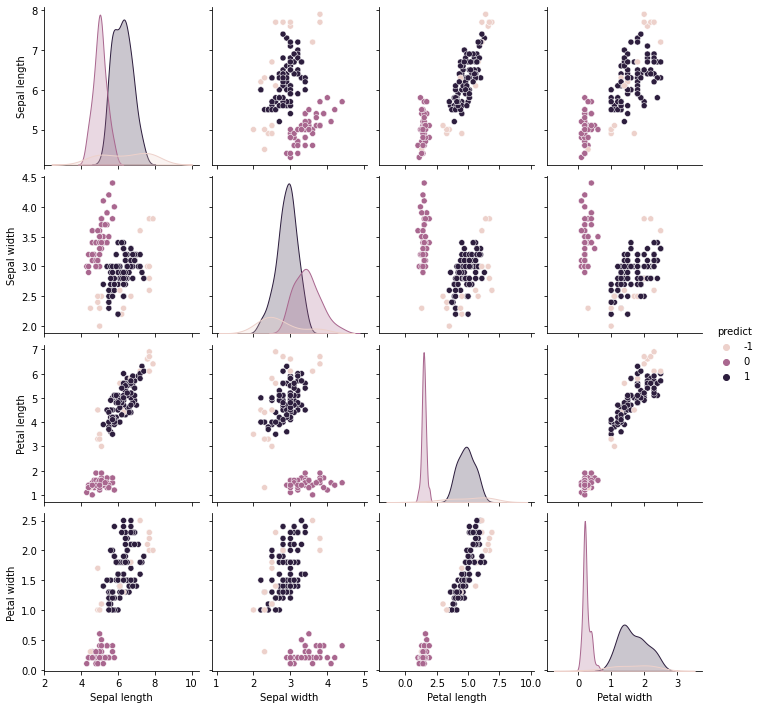

In [9]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

- 이하는 실제값

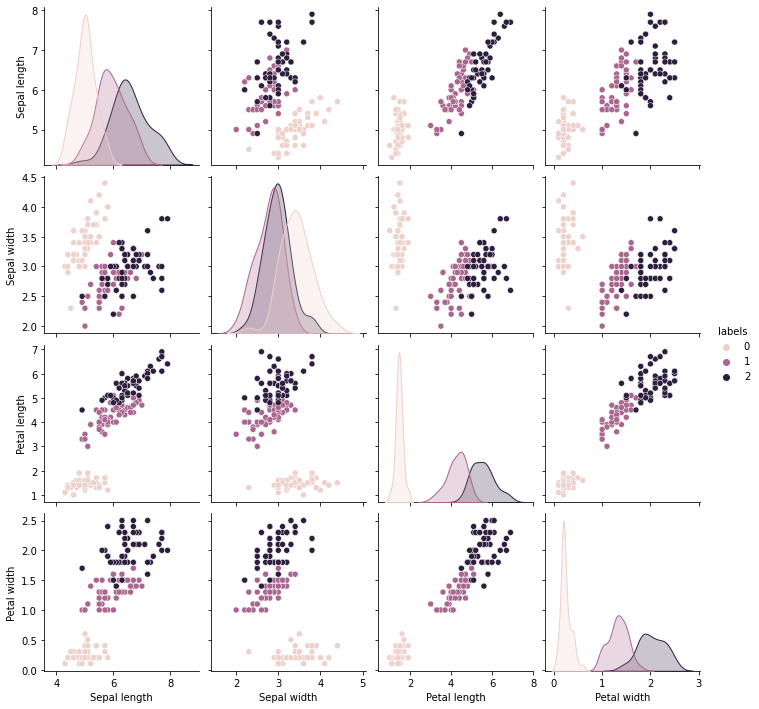

In [10]:
#pairplot with Seaborn
sns.pairplot(data,hue='labels')
plt.show()

**위 예측군집과 실제군집을 비교해보면, 차이가 좀 심하게 나는 것을 알 수 있다. 이 데이터의 특성에 DBSCAN이 잘 맞는다고 말할 수 없는 것이다. 실제로 해당 샘플데이터는 K-means에 잘 맞는다. 그리고 너무 가까운 거리에 군집 여러개가 함께 있을 때 DBSCAN은 잘 구분을 해내지 못한다.**

아래 과정은 K-means를 통해서 군집분석을 진행한 것이다. 아래는 기존 데이터가 3개의 군집이 있다는 것을 알기에 3개의 클러스터를 parameter로 지정해주고 n_clusters=3 fitting을 하였다. 

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=21)
km.fit(feature)

KMeans(n_clusters=3, random_state=21)

In [13]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']

In [14]:
r2 = pd.concat([feature,new_labels],axis=1)

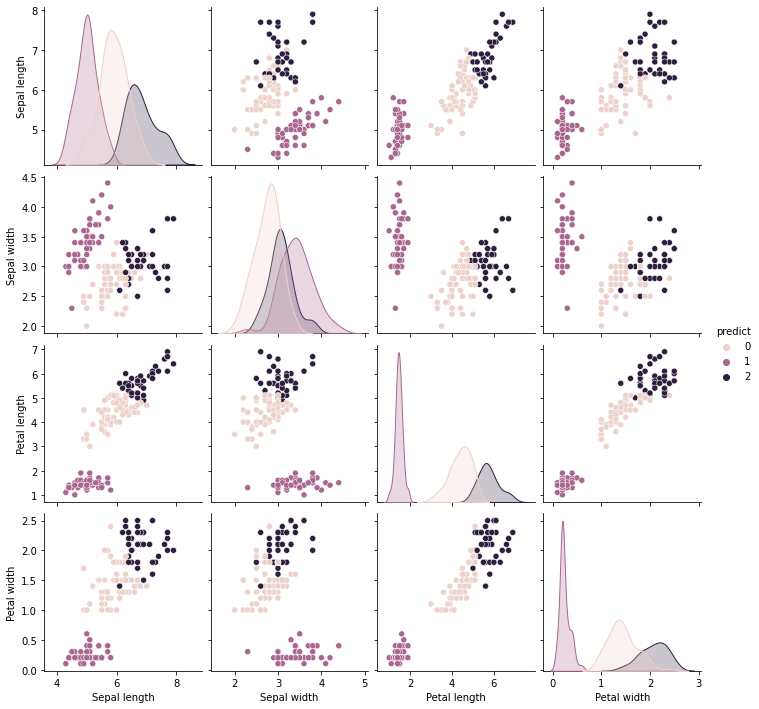

In [15]:
#pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

결과를 보면 K-means가 DBSCAN보다 훨씬 성능이 좋은 거 같다. 하지만 이는 데이터의 특수정 때문인 것이다. 머신러닝 모델도 그렇듯이 군집분석 또한 항상 가장 나은 모델은 없다. 데이터에 맞는 특정 모델을 맞춰어 사용할 필요가 있다.  

---

DBSCAN이 잘 되는 것을 확인하기 위해서 다른 실습데이터를 살펴보겠다. 
<br>
이하 블로그를 참고했으므로, 이하 블로그에서 샘플데이터를 받을 수 있다. <br>
- https://todayisbetterthanyesterday.tistory.com/62
- https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#hdbscan

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [17]:
data = np.load('./sample data/clusterable_data.npy')

In [18]:
plt.rcParams["figure.figsize"] = (20,12)

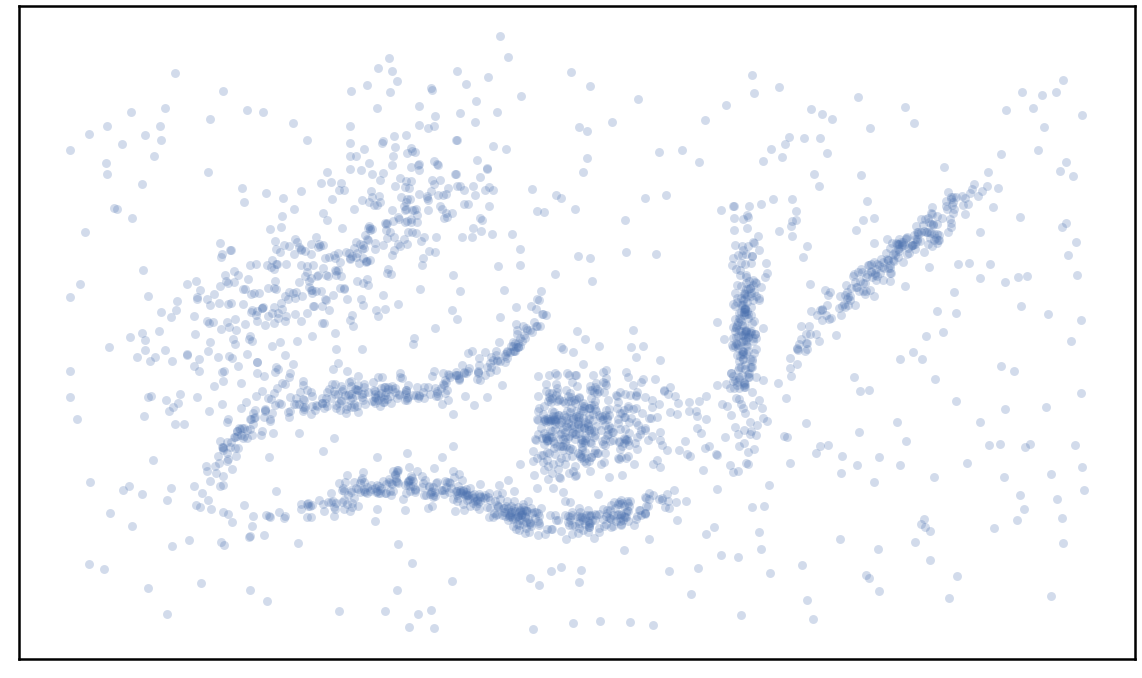

In [19]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

실습데이터를 scatter plot으로 표현해보았다. 눈으로 보기에 크게 4,5가지의 군집이 존재하는 것 처럼 보인다. 그 외의 잡음(noise)도 꽤나 많이 있는 거 같다. 이 데이터를 각 군집화 조건으로 알맞은 군집화 방법을 찾아보자! 

In [20]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

위는 군집화와 시각화를 해주는 것을 함수로 정의한 것이다. 

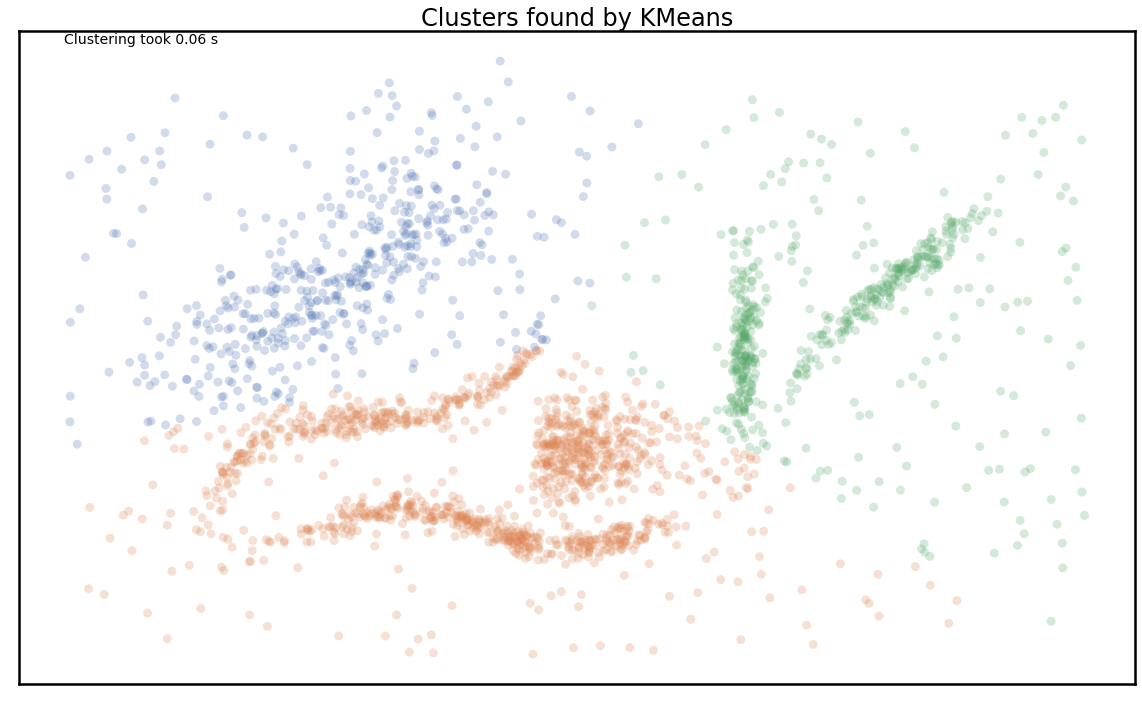

In [21]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

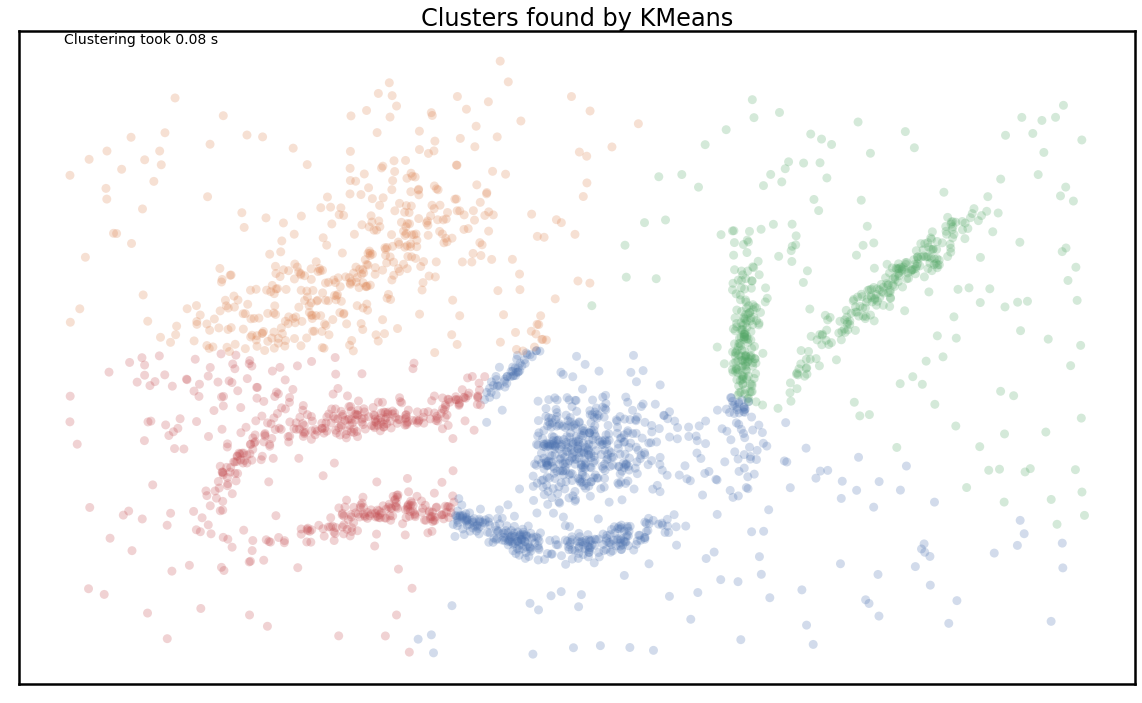

In [22]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

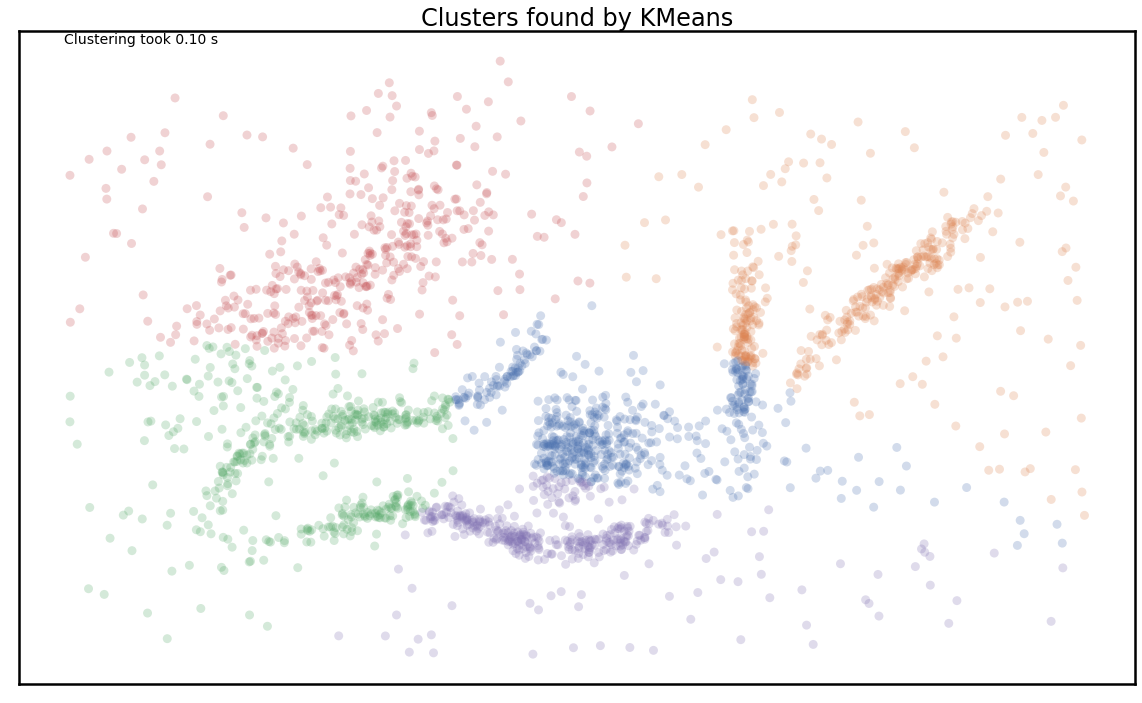

In [23]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

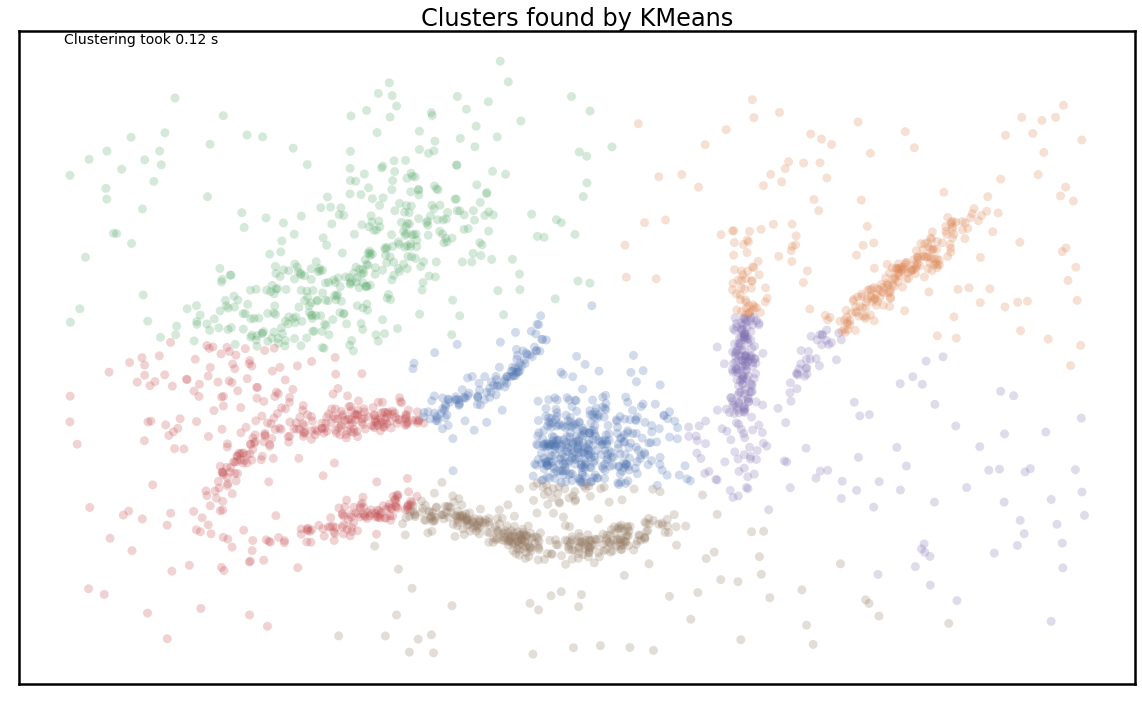

In [24]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

군집화 4 이후로 보면 클러스터링 한 경우, 같은 군집으로 분류되어야 하는 부분이 다른 군집으로 분류된 것을 확인할 수 있다. <br>
지금까지 K-means 방법이었고, DBSCAN 방식을 확인해보면(이하)

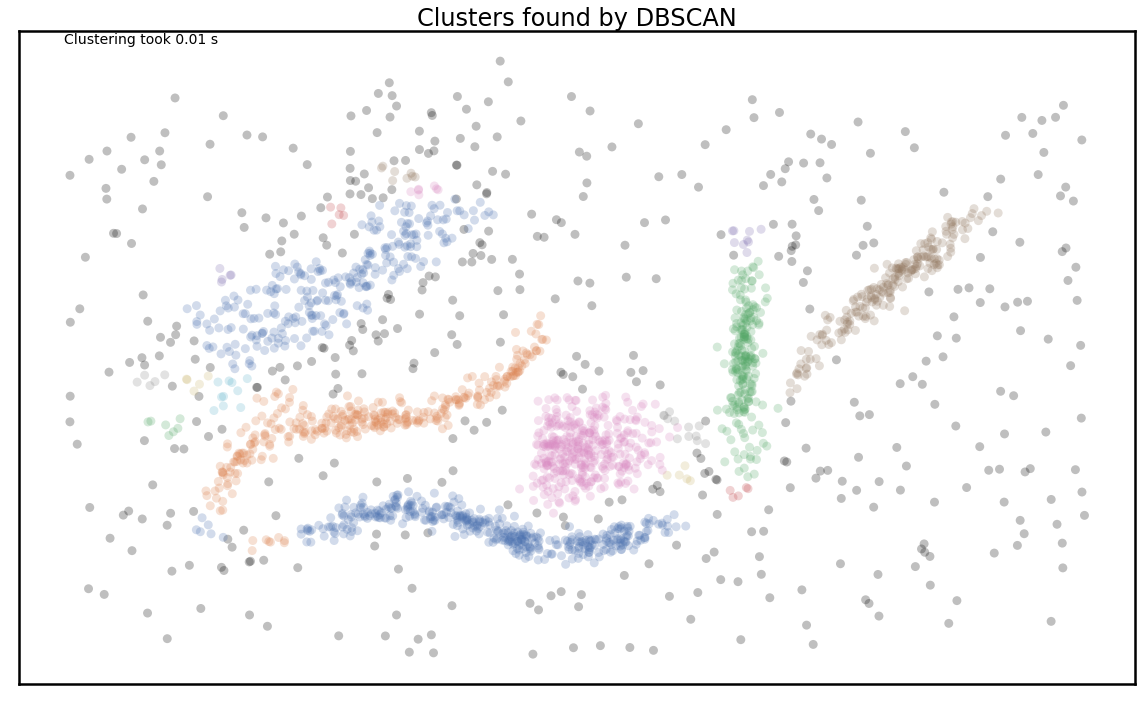

In [25]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

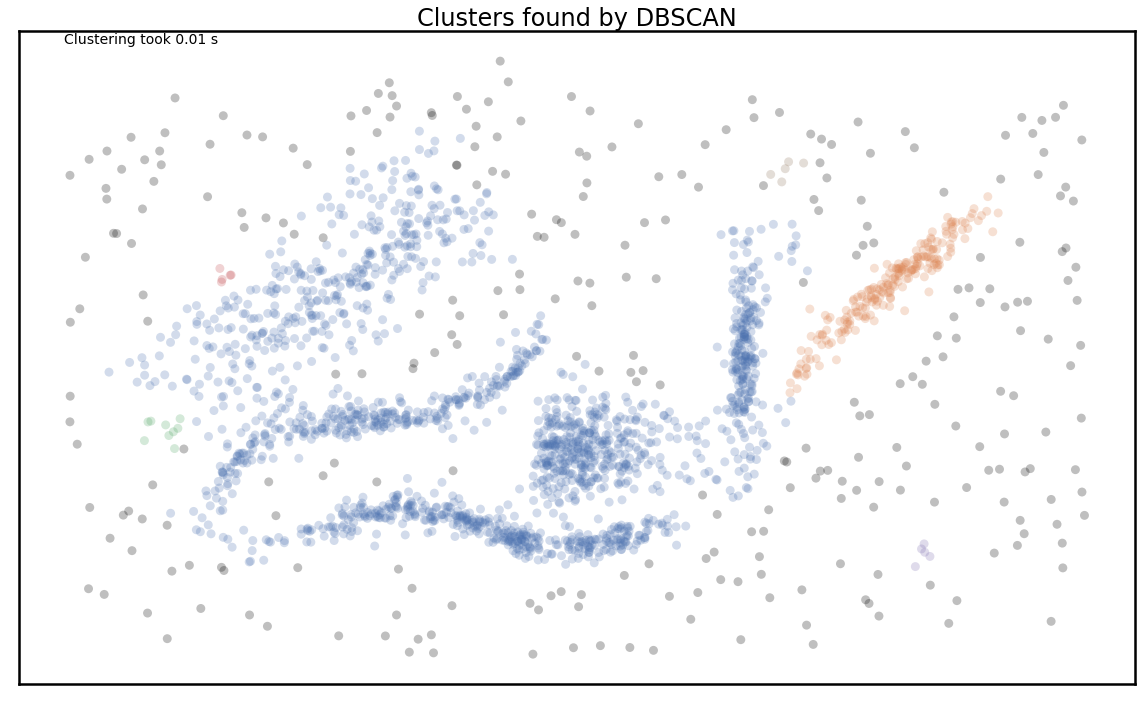

In [26]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})


위의 결과는 eps(epsilon)즉 거리를 0.03 기준으로 분포한 데이터를 군집화시킨 DBSCAN이다. 결과적으로 크게 2가지의 cluster가 형성된 것으로 보인다. 

위의 차이를 확인해보자. 먼저 K-means에는 이상치로 판단된 sample이 존재하지 않았다. 즉 회색부분이 존재하지 않았다. 이 원인은 K-means는 중심점을 잡고 전반적인 데이터들의 거리를 평균 계산하여 군집을 형성하기 때문이다. <br><br>
반면 DBSCAN은 회색부분이 많다. 주된 영역을 제외하면 모두 회색이다. 이는 한 sample에서 다른 sample간 1:1 거리 계산을 통해서 군집을 확장시켜 나가기 때문에 일정 거리(epsilon)이 넘어가면 이상치로 판단하기 때문이다. 그렇기에 확실하게 K-means보다는 이상치에 덜 민간하다. 하지만, eps를 잘 선택해야한다는 문제가 있다. eps를 잘 선택하는 것 또한 K-means에서 최적의 K를 찾는 것 만큼 힘들다. 

In [27]:
dbs = DBSCAN(eps=0.03)
dbs2=dbs.fit(data)
dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0])

DBSCAN으로 형성한 군집분석의 결과는 다른 clustering 모델과 동일하게 labels 함수를 통해서 알아낼 수 있다. 

**마지막으로 DBSCAN의 upgrade version인 HDBSCAN모델이 있다. HDBSCAN은 DBSCAN보다 하이퍼 파라미터(eps, min_samples)에 덜 민감하다는 장점이 있다.**

- python 및 numpy version 때문에 이하 안되는 거 같음..
    - python 3.7 버젼 수행으로 해결함, 이전에는 3.9 버젼이었음 Gooood

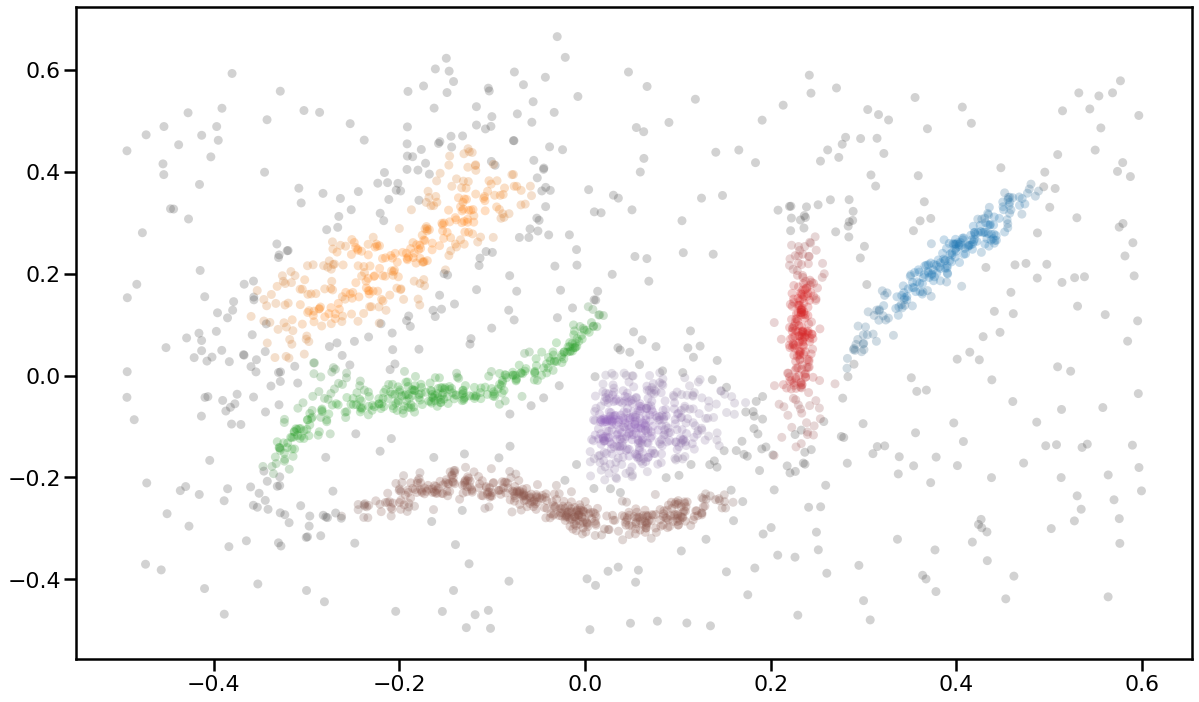

In [31]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(data)

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=cluster_colors, **plot_kwds)

hdbscan에 대한 정의는 https://ichi.pro/ko/hdbscan-mich-mildo-giban-keulleoseuteoling-ihae-19918965781006 이곳을 통해서 확인할 예정 